In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

## 1. Load All CSV Files

In [2]:
# Đường dẫn data
data_path = Path(r'c:\Users\Tplab\OneDrive\CNN tutorial\data\raw')
csv_files = sorted(list(data_path.glob('*.csv')))

print(f"Tổng số file: {len(csv_files)}")

# Tên cột
column_names = [
    'pkSeqID', 'stime', 'flgs', 'proto', 'saddr', 'sport', 'daddr', 'dport',
    'pkts', 'bytes', 'state', 'ltime', 'seq', 'dur', 'mean', 'stddev',
    'smac', 'dmac', 'sum', 'min', 'max', 'soui', 'doui', 'sco', 'dco',
    'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'srate', 'drate',
    'attack', 'category', 'subcategory'
]

Tổng số file: 75


In [3]:
# Merge 20 files đầu tiên (để tránh tràn RAM)
# Có thể tăng lên sau khi test xong
NUM_FILES = 20

print(f"Đang merge {NUM_FILES} files đầu tiên...")
df_list = []

for i, file in enumerate(csv_files[:NUM_FILES], 1):
    df_temp = pd.read_csv(file, header=None, names=column_names, low_memory=False)
    df_list.append(df_temp)
    print(f"Đã load {i}/{NUM_FILES} files...")
    
    # Giải phóng memory ngay sau khi append
    del df_temp

# Concat all dataframes
print("\nĐang concat dataframes...")
df = pd.concat(df_list, ignore_index=True)

# Giải phóng df_list
del df_list

print(f"\nMerge hoàn tất!")
print(f"Total shape: {df.shape}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**3:.2f} GB")

Đang merge 20 files đầu tiên...
Đã load 1/20 files...
Đã load 1/20 files...
Đã load 2/20 files...
Đã load 2/20 files...
Đã load 3/20 files...
Đã load 3/20 files...
Đã load 4/20 files...
Đã load 4/20 files...
Đã load 5/20 files...
Đã load 5/20 files...
Đã load 6/20 files...
Đã load 6/20 files...
Đã load 7/20 files...
Đã load 7/20 files...
Đã load 8/20 files...
Đã load 8/20 files...
Đã load 9/20 files...
Đã load 9/20 files...
Đã load 10/20 files...
Đã load 10/20 files...
Đã load 11/20 files...
Đã load 11/20 files...
Đã load 12/20 files...
Đã load 12/20 files...
Đã load 13/20 files...
Đã load 13/20 files...
Đã load 14/20 files...
Đã load 14/20 files...
Đã load 15/20 files...
Đã load 15/20 files...
Đã load 16/20 files...
Đã load 16/20 files...
Đã load 17/20 files...
Đã load 17/20 files...
Đã load 18/20 files...
Đã load 18/20 files...
Đã load 19/20 files...
Đã load 19/20 files...
Đã load 20/20 files...

Đang concat dataframes...
Đã load 20/20 files...

Đang concat dataframes...

Merge hoàn 

## 2. Data Cleaning

In [4]:
# Xóa các cột hoàn toàn rỗng
columns_to_drop = ['smac', 'dmac', 'soui', 'doui', 'sco', 'dco']
df = df.drop(columns=columns_to_drop)

print(f"Đã xóa {len(columns_to_drop)} cột rỗng")
print(f"Shape sau khi xóa: {df.shape}")

Đã xóa 6 cột rỗng
Shape sau khi xóa: (20000000, 29)


In [5]:
# Kiểm tra duplicates
print(f"Số dòng trùng lặp: {df.duplicated().sum():,}")

# Xóa duplicates
df = df.drop_duplicates()
print(f"Shape sau khi xóa duplicates: {df.shape}")

Số dòng trùng lặp: 0
Shape sau khi xóa duplicates: (20000000, 29)
Shape sau khi xóa duplicates: (20000000, 29)


In [6]:
# Handle missing values trong sport và dport
print("Missing values trước khi xử lý:")
print(df[['sport', 'dport']].isnull().sum())

# Fill missing với giá trị đặc biệt (0 hoặc 'unknown')
df['sport'] = df['sport'].fillna('0')
df['dport'] = df['dport'].fillna('0')

print("\nMissing values sau khi xử lý:")
print(df[['sport', 'dport']].isnull().sum())

Missing values trước khi xử lý:
sport    1394
dport    1394
dtype: int64
sport    1394
dport    1394
dtype: int64

Missing values sau khi xử lý:

Missing values sau khi xử lý:
sport    0
dport    0
dtype: int64
sport    0
dport    0
dtype: int64


## 3. Analyze Label Distribution

In [7]:
# Phân bố attack/normal
print("Attack distribution:")
print(df['attack'].value_counts())
print(f"\nAttack ratio: {df['attack'].value_counts(normalize=True)*100}")

print("\n" + "="*50)
print("Category distribution:")
print(df['category'].value_counts())

print("\n" + "="*50)
print("Subcategory distribution:")
print(df['subcategory'].value_counts())

Attack distribution:
attack
1    19992447
0        7553
Name: count, dtype: int64

Attack ratio: attack
1    99.962235
0     0.037765
Name: proportion, dtype: float64

Category distribution:
category
DoS               18169221
Reconnaissance     1821639
Normal                7553
Theft                 1587
Name: count, dtype: int64

Subcategory distribution:
subcategory
UDP                  12823098
TCP                   5316417
Service_Scan          1463364
OS_Fingerprint         358275
HTTP                    29706
Normal                   7553
Keylogging               1469
Data_Exfiltration         118
Name: count, dtype: int64
category
DoS               18169221
Reconnaissance     1821639
Normal                7553
Theft                 1587
Name: count, dtype: int64

Subcategory distribution:
subcategory
UDP                  12823098
TCP                   5316417
Service_Scan          1463364
OS_Fingerprint         358275
HTTP                    29706
Normal                   7553

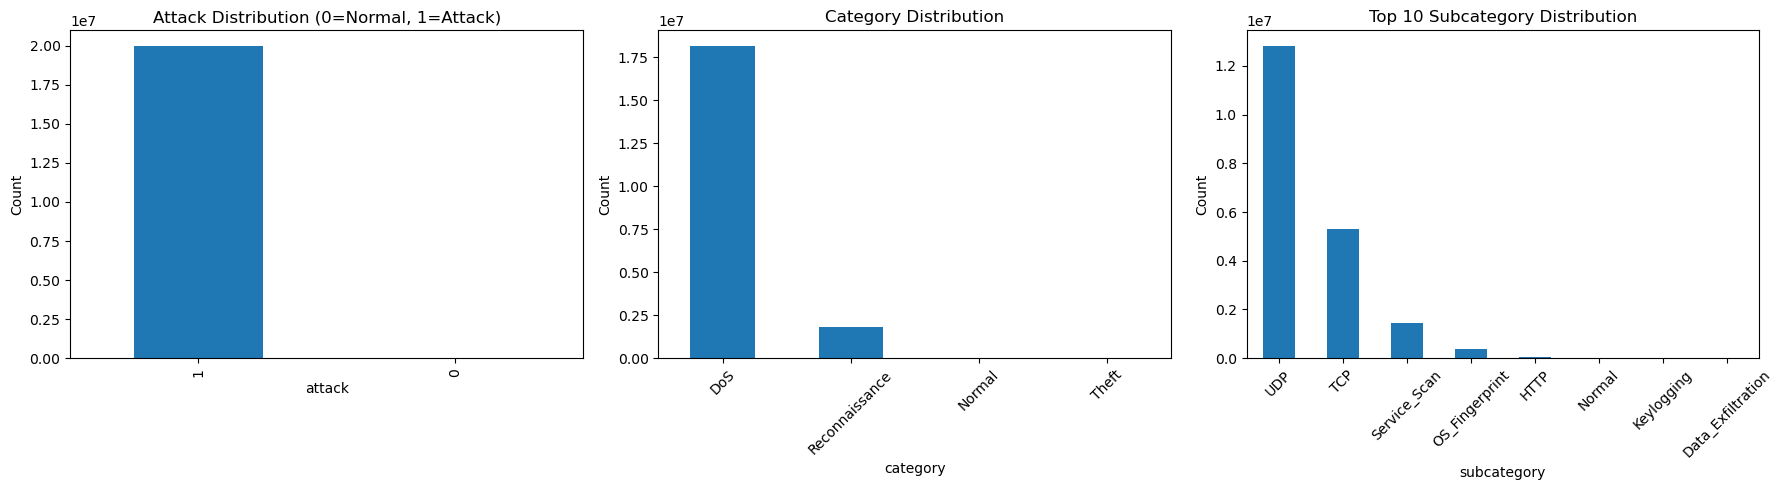

In [8]:
# Visualize distribution
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Attack
df['attack'].value_counts().plot(kind='bar', ax=axes[0])
axes[0].set_title('Attack Distribution (0=Normal, 1=Attack)')
axes[0].set_ylabel('Count')

# Category
df['category'].value_counts().plot(kind='bar', ax=axes[1])
axes[1].set_title('Category Distribution')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)

# Subcategory (top 10)
df['subcategory'].value_counts().head(10).plot(kind='bar', ax=axes[2])
axes[2].set_title('Top 10 Subcategory Distribution')
axes[2].set_ylabel('Count')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 4. Feature Engineering

In [9]:
# Xác định các cột cần encode
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
# Loại bỏ label columns khỏi categorical
categorical_cols = [col for col in categorical_cols if col not in ['category', 'subcategory']]

print(f"Categorical columns cần encode: {categorical_cols}")

Categorical columns cần encode: ['flgs', 'proto', 'saddr', 'sport', 'daddr', 'dport', 'state']


In [10]:
# Label encoding cho categorical features
from sklearn.preprocessing import LabelEncoder

le_dict = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    le_dict[col] = le
    print(f"Encoded {col}: {len(le.classes_)} unique values")

Encoded flgs: 13 unique values
Encoded proto: 7 unique values
Encoded proto: 7 unique values
Encoded saddr: 26 unique values
Encoded saddr: 26 unique values
Encoded sport: 131078 unique values
Encoded sport: 131078 unique values
Encoded daddr: 270 unique values
Encoded daddr: 270 unique values
Encoded dport: 70793 unique values
Encoded dport: 70793 unique values
Encoded state: 14 unique values
Encoded state: 14 unique values


In [11]:
# Label encoding cho target
le_category = LabelEncoder()
le_subcategory = LabelEncoder()

df['category_encoded'] = le_category.fit_transform(df['category'])
df['subcategory_encoded'] = le_subcategory.fit_transform(df['subcategory'])

print("Category mapping:")
for i, cat in enumerate(le_category.classes_):
    print(f"  {i}: {cat}")

print("\nSubcategory mapping:")
for i, subcat in enumerate(le_subcategory.classes_):
    print(f"  {i}: {subcat}")

Category mapping:
  0: DoS
  1: Normal
  2: Reconnaissance
  3: Theft

Subcategory mapping:
  0: Data_Exfiltration
  1: HTTP
  2: Keylogging
  3: Normal
  4: OS_Fingerprint
  5: Service_Scan
  6: TCP
  7: UDP


## 5. Save Processed Dataset

In [12]:
# Lưu dataset đã xử lý
output_path = Path(r'c:\Users\Tplab\OneDrive\CNN tutorial\data\processed')
output_path.mkdir(exist_ok=True)

output_file = output_path / 'bot_iot_processed.csv'
df.to_csv(output_file, index=False)

print(f"Đã lưu dataset vào: {output_file}")
print(f"File size: {output_file.stat().st_size / 1024**3:.2f} GB")
print(f"Final shape: {df.shape}")

Đã lưu dataset vào: c:\Users\Tplab\OneDrive\CNN tutorial\data\processed\bot_iot_processed.csv
File size: 3.30 GB
Final shape: (20000000, 31)


In [13]:
# Lưu label encoders để dùng sau này
import pickle

encoders = {
    'categorical': le_dict,
    'category': le_category,
    'subcategory': le_subcategory
}

with open(output_path / 'label_encoders.pkl', 'wb') as f:
    pickle.dump(encoders, f)

print("Đã lưu label encoders!")

Đã lưu label encoders!


## 6. Dataset Summary

In [14]:
print("=" * 60)
print("DATASET SUMMARY")
print("=" * 60)
print(f"Total samples: {len(df):,}")
print(f"Total features: {df.shape[1]}")
print(f"\nAttack distribution:")
print(df['attack'].value_counts())
print(f"\nMemory usage: {df.memory_usage(deep=True).sum() / 1024**3:.2f} GB")
print(f"\nColumns: {df.columns.tolist()}")

DATASET SUMMARY
Total samples: 20,000,000
Total features: 31

Attack distribution:
attack
1    19992447
0        7553
Name: count, dtype: int64

Memory usage: 5.62 GB

Columns: ['pkSeqID', 'stime', 'flgs', 'proto', 'saddr', 'sport', 'daddr', 'dport', 'pkts', 'bytes', 'state', 'ltime', 'seq', 'dur', 'mean', 'stddev', 'sum', 'min', 'max', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'srate', 'drate', 'attack', 'category', 'subcategory', 'category_encoded', 'subcategory_encoded']
